# Неделя 2. Среда 

## Математический анализ

In [1]:
# Имортируй библиотеки
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import numpy as np

### Анализ

❓Что значит, что производная в точке равна нулю? 

> Это может значит либо локальный максимум, минимум или точну перегиба. Т.е. в этой точке функция достигает наименьшего значения. Касательная к графику равна нулю. "Ускорение" равно нулю

Найдите производную функций ниже

1. $y = \dfrac{3x^7}{7}$

$y' = {3x^6}$

2. $y = -7$

$y' = 0$

3. $y = \dfrac{9}{x}$

$y' = -\dfrac{9}{x^2}$

4. $y = 11 - 6x$

$y' = -6$

5. $y = 8\sqrt{x} + 7\sin{x}$

$y' = \dfrac{4}{\sqrt{x}} + 7\cos{x}$

6. $y = \dfrac{\sin{x}}{5x}$

$y' = \dfrac{x\cos{x} + \sin{x}}{5x^2}$

7. $y = \dfrac{\cot{x} + 2}{3x}$

$y' = -\dfrac{x\csc^2{x} + \cot{x} + 2}{3x^2}$

8. $y = (3-7x)^9$

$y' = -63(3-7x)^8$

9. Найдите производную в точке $t = 3$:

$y(t) = t^6 - 4t^3$

Производная:

$y(t) = 6t^5 - 12t^2$

В точке $t = 3$:

$y(3) = 1350$

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks in progress"`
4. Выполни команду `git push`

### Градиентный спуск

#### 1. Градиентный спуск функции одного переменного

1. Задай функцию `loss`: она будет возвращать значение функции в точке. Для начала можно использовать простую функцию, например: 
$$L(\omega) = \omega^2 + 3$$

In [53]:
def loss(w):
    loss = w ** 2 + 3
    return loss

2. Задай функцию `derivative` - она будет возвращать значение производной функции `loss` в точке. 

In [54]:
def derivative(w):
    deriv = w * 2
    return deriv

3. Задай функцию `step` - она будет возвращать новое значение весов по формуле:
$$w_{i+1} = w_i - \lambda \cdot \frac{\partial f(w)}{\partial w_i}$$

Входные аргументы: `w` - текущее значение параметра, `lambda` – скорость спуска. 

In [55]:
def step(w, _lambda):
    coord = w - _lambda * derivative(w)
    loss_value = loss(coord)
    return coord, loss_value

4. Задай функцию `get_minima`, которая будет возвращать список, содержащий все значения параметра `w`, и список `loss_values`, который будет содержать значения функции `loss` для соответствующего параметра `w`. На вход функции поступает `w_0` – начальное значение параметра, `eps` – критерий останова. `lambda` - скорость спуска, которая будет передаваться в функцию `step`

In [149]:
def get_minima(w_0, eps, _lambda):
    w = []
    loss_values = []

    w_cur = w_0
    loss_cur = loss(w_0)

    w.append(w_cur)
    loss_values.append(loss_cur)

    while True:
        w_new, loss_new = step(w_cur, _lambda)
        if abs(loss_new - loss_cur) < eps:
            print(f"Кордината омеги: {w_cur}")
            print(f"Минимальное значение функции: {loss_cur}")
            print(f"Количество шагов: {len(w)}")
            break
        else:
            w.append(w_new)
            loss_values.append(loss_new)
            w_cur, loss_cur = w_new, loss_new

    return np.array(w), np.array(loss_values)

In [123]:
alpha = 0.1
eps = 0.01

w, loss_values = get_minima(3, eps, alpha)

Кордината омеги: 0.16492674416640002
Минимальное значение функции: 3.027200830941329


Нарисуй график функции `loss`. По координатам, возвращенным функцией `get_minima` нарисуй график движения градиентного спуска. 

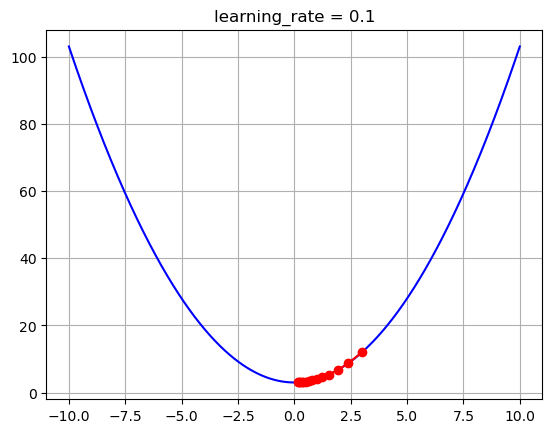

In [124]:
x = np.linspace(-10, 10, 1000)


plt.plot(x, loss(x), color='blue')
plt.plot(w, loss_values, color='red', marker='o')
plt.title(f"learning_rate = {alpha}")
plt.grid()

Нарисуй несколько графиков, соответствующих разным коэффициентам $\lambda$. 

Кордината омеги: 0.637438953472
Минимальное значение функции: -0.23111053406852144
Количество шагов: 14
Кордината омеги: 0.636909428672063
Минимальное значение функции: -0.23125580834068926
Количество шагов: 20
Кордината омеги: 0.5957381119999999
Минимальное значение функции: -0.24083421391067544
Количество шагов: 10
Кордината омеги: 0.59728
Минимальное значение функции: -0.2405366016
Количество шагов: 6
Кордината омеги: 0.576
Минимальное значение функции: -0.244224
Количество шагов: 4
Кордината омеги: 0.5
Минимальное значение функции: -0.25
Количество шагов: 2
Кордината омеги: 0.42400000000000004
Минимальное значение функции: -0.244224
Количество шагов: 4
Кордината омеги: 0.4027200000000001
Минимальное значение функции: -0.2405366016
Количество шагов: 6
Кордината омеги: 0.4042618879999998
Минимальное значение функции: -0.24083421391067542
Количество шагов: 10
Кордината омеги: 0.36309057132793665
Минимальное значение функции: -0.2312558083406892
Количество шагов: 20


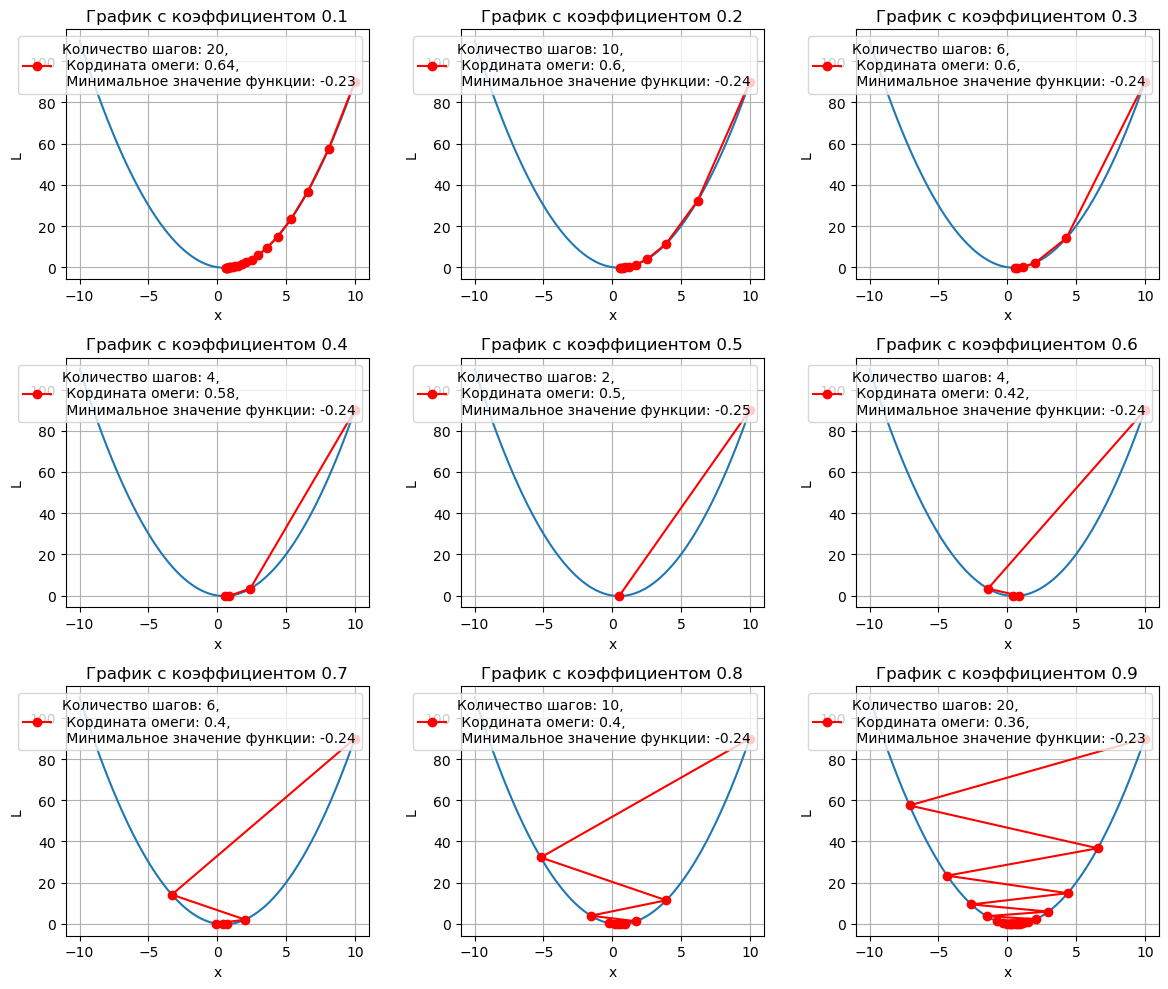

In [157]:
x = np.linspace(-10, 10, 1000)

aplha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
eps = 0.01

w, loss_values = get_minima(3, eps, alpha)

fig, axes = plt.subplots(3, 3, figsize=(12, 10))  


for i, ax in enumerate(axes.flat):
    a = aplha[i]
    w, loss_values = get_minima(10, eps, a)
    y = loss(x)  
    ax.plot(x, y)

    ax.plot(w, loss_values, color='red', marker='o', label=f"Количество шагов: {len(w)},\n Кордината омеги: {round(w[-1], 2)},\n Минимальное значение функции: {round(loss_values[-1], 2)}")  # Добавляем точки

    ax.set_title(f'График с коэффициентом {a}')
    ax.set_xlabel('x')
    ax.set_ylabel('L')
    ax.legend()
    ax.grid()


plt.tight_layout()
plt.show()

❓ Как выбрать оптимальную скорость обучения?

> Не знаю, но если судить по графикам, то самый быстрый вариант, это альфа 0.5 

❓Будет ли зависеть скорость работы всей процедуры от начального выбора значения искомого параметра?

> Да, конечно. Если взять слишком большое значени, то необходимо будем совершить гораздо большее количество итераций

Поэкспериментируй с результатом, задай функцию: 
$$L(\omega) = \omega^2 - \omega$$

Кордината омеги: 0.637438953472
Минимальное значение функции: -0.23111053406852144
Количество шагов: 14


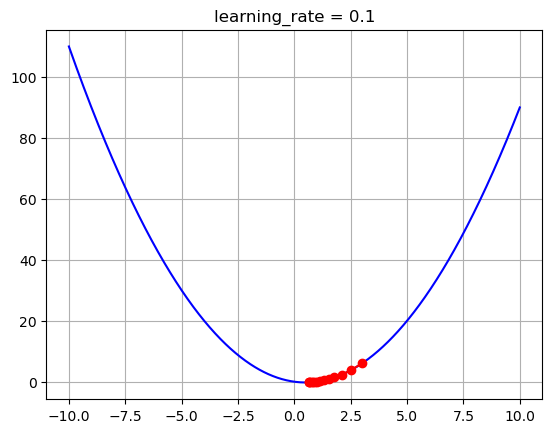

In [156]:
# code
def loss(w):
    less = w ** 2 - w
    return less

def derivative(w):
    deriv = 2 * w - 1
    return deriv

alpha = 0.1
eps = 0.01

w, loss_values = get_minima(3, eps, alpha)

x = np.linspace(-10, 10, 1000)


plt.plot(x, loss(x), color='blue')
plt.plot(w, loss_values, color='red', marker='o')
plt.title(f"learning_rate = {alpha}")
plt.grid()

#### 2. Градиентный спуск для функции двух переменных

1. Модифицируй функции из предыдущего задания и реализуй поиск минимума функции двух переменных. 
Функция для минимизации: 
$$\mathcal{L} (\omega_1, \omega_2) = \omega_1^2 + 2\omega_2^2 - 3\omega_1 - 4\omega_2$$

В конце визуализируй результат аналогично предыдущему заданию.


__P.S__: для данной функции, минимальное значение достигается в точке $(\dfrac{3}{2}; 1)$. Это необходимо для самопроверки

In [172]:
def loss2(w):
    w = np.array(w)
    loss = w[0] ** 2 + 2 * w[1] ** 2 - 3 * w[0] - 4 * w[1]
    return loss

In [173]:

loss2([1.5, 1])

np.float64(-4.25)

In [174]:
def derivative2(w):
    deriv = np.array([2 * w[0] - 3, 4 * w[1] - 4]) 
    return deriv

In [175]:
derivative2([2, 2])

array([1, 4])

In [179]:
def step(w, _lambda):
    coord = w - _lambda * derivative2(w)
    loss_value = loss2(coord)
    return coord, loss_value

In [182]:
def get_minima(w_0, eps, _lambda):
    w = [w_0]
    loss_values = [loss2(w_0)]

    w_cur = w_0
    loss_cur = loss2(w_cur)

    while True:
        w_new, loss_new = step(w_cur, _lambda)

        w.append(w_new)
        loss_values.append(loss_new)

        if np.abs(loss_new - loss_cur) < eps:
            print(f"Кордината омеги: {w_cur}")
            print(f"Минимальное значение функции: {loss_cur}")
            break

        w_cur, loss_cur = w_new, loss_new
    
    return np.array(w), np.array(loss_values)

In [183]:
w, loss_values = get_minima([40,40], 0.00001, 0.1)

Кордината омеги: [1.50511753 1.00000005]
Минимальное значение функции: -4.249973810909377


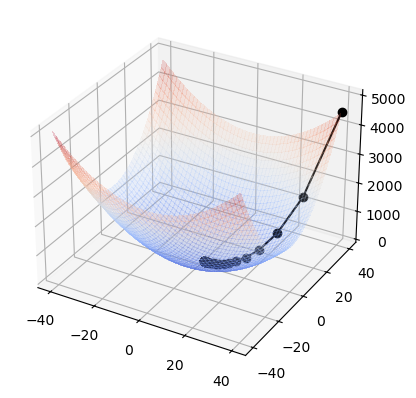

In [185]:
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
# X = x[:, 0]
# Y = x[:, 1]

X = np.arange(-40, 40, 0.2)
Y = np.arange(-40, 40, 0.2)
X, Y = np.meshgrid(X, Y)

Z = X ** 2 + 2 * Y ** 2 - 3 * X - 4 * Y

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.2)


ax.plot(w[:, 0], w[:, 1], loss_values, color='k', marker='o')


plt.show()

2. С помощью градиентного _спуска_ можно найти и __максимум__ функции, для этого нужно внести небольшое изменение в формулу обновления весов. Попробуйте сделать это и визуализировать результат: 
$$L(w_1, w_2) = \dfrac{1}{1+w_1^2} + \dfrac{1}{1+w_2^2}$$  


__P.S__: для данной функции, максимальное значение достигается в точке $(0; 0)$. Это необходимо для самопроверки

In [192]:
def loss3(w):
    w = np.array(w)
    loss = (1 / (1 + w[0] ** 2)) + (1 / (1 + w[1] ** 2))
    return loss

In [193]:
def derivative3(w):
    deriv = np.array([- (2 * x[0]) / (1 + x[0] ** 2) ** 2, - (2 * x[1]) / (1 + x[1] ** 2) ** 2])
    return deriv

In [195]:
def step3(w, _lambda):
    coord = np.array(w) + _lambda * derivative3(w)
    loss_value = loss3(coord)
    return coord, loss_value

In [196]:
def get_minima3(w_0, eps, _lambda):
    w = []
    loss_values = []

    w_cur = np.array(w_0)
    loss_cur = np.array(loss3(w_cur))

    w.append(w_cur)
    loss_values.append(loss_cur)

    while True:
        w_new, loss_new = step3(w_cur, _lambda)

        if np.abs(loss_new - loss_cur) < eps:
            print('x координата - ', w_cur)
            print('Наибольшее значение функции - ', loss_cur)
            break

        w.append(w_new)
        loss_values.append(loss_new)

        w_cur, loss_cur = w_new, loss_new

    return np.array(w), np.array(loss_values)

In [198]:
w, loss_values = get_minima3([5,5], 0.00001, 0.1)

x координата -  [-2.984  2.006]
Наибольшее значение функции -  0.3000098552522551


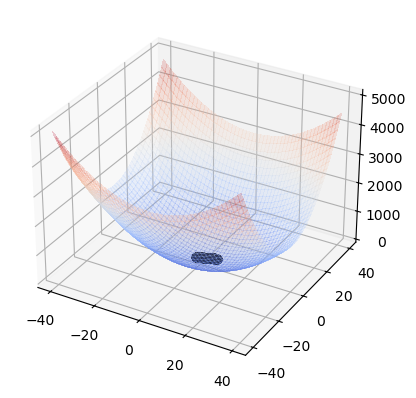

In [199]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
# X = x[:, 0]
# Y = x[:, 1]

X = np.arange(-40, 40, 0.2)
Y = np.arange(-40, 40, 0.2)
X, Y = np.meshgrid(X, Y)

Z = X ** 2 + 2 * Y ** 2 - 3 * X - 4 * Y

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.2)


ax.plot(w[:, 0], w[:, 1], loss_values, color='k', marker='o')


plt.show()

3. С помощью градиентного спуска найти минимум функции и визуализировать результат. Незабывайте, код у вас уже реализован в предыдущих заданиях, примените его.  
$$L(w1, w2) = (5 \cdot \omega_1)^2 + \omega_2^2$$

In [208]:
# code
def loss3(w):
    w = np.array(w)
    loss = 25 * w[0] ** 2 + w[1] ** 2
    return loss

def derivative3(w):
    deriv = np.array([50 * w[0], 2 * w[1]])
    return deriv

def step3(w, _lambda):
    coord = np.array(w) - _lambda * derivative3(w)
    loss_value = loss3(coord)
    return coord, loss_value

In [1]:
#w, loss_values = get_minima3([5,5], 0.001, 0.1)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks stage 2"`
4. Выполни команду `git push`

#### Адаптивная скорость обучения

Модифицируй одну из предыдущих реализаций, добавив [адаптивный подбор скорости обучения](https://en.wikipedia.org/wiki/Learning_rate) (time-based, step-based, exponential)

In [ ]:
# code

#### Решение системы линейных уравнений с помощью градиентного спуска


Реализуй класс `Solver` для вычисления решения системы линейных уравнений произвольного размера.  

Логика работы класса должна быть следующей: 

```python

solver = Solver(X, y)
solver.fit(learning_rate=0.01, n_iter=10)
print(solver.mse())
>>> Mean squared error: 0.00313
print(solver.coef_)
>>> [.5, 1, -2]

```

`X` – матрица системы

`y` – вектор ответов

`learning_rate` – шаг градинтного спуска

`n_iter` - число итераций. 

Метод `mse` вычисляет среднеквадратическую ошибку: `sum((y - X@w)**2) / len(w)`, где `w` - искомый вектор коэффициентов. 

Попробуй решить с помощью реализованного класса систему уравнений:
$$
\begin{cases}
2w_1 + 3w_2 - w_3 = 9 \\
w_1 -2w_2 + w_3 = 3 \\
w_1 + 2w_3 = 2
\end{cases}
$$

Решение уравнения выше – 4, 0, -1. Значения, которые ты получишь в процессе оптимизации могут незначительно отличаться. 


In [150]:
X = np.array([
    [2, 3, -1],
    [1, -2, 1],
    [1, 0, 2]
])

y = np.array([9, 3, 2])

In [154]:
# code

In [152]:
solver = Solver(X, y)
solver.fit(0.1, 100)
solver.mse()

#### Реализация класса оптимизатора

Реализуй класс, который `Optimizer`, который будет решать задачу минимизации функции, сохранения истории процедуры, визуализации и возможностью выбирать один из типов управления скоростью обучения. Добавь возможность задания параметра для реализации остановки. 

In [8]:
class Optimizer():
    pass

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "calculus tasks completed"`
4. Выполни команду `git push`